<a href="https://colab.research.google.com/github/JS-Abhishek/Spatial-Attention-Network-for-DR-Classification/blob/main/Gaussian%20Blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Extracting a sample Image from the Dataset

In [ ]:
root_path = '/content/gdrive/MyDrive/Training/1/1000_left.jpeg'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread(root_path)

Converting the image to GrayScale, then resizing the image to 512*512. The weighted addition of the original image and the gaussian blur is done to obtain the final image. 

In [ ]:
def eye_processing(image):
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(512,512))
  image = cv2.addWeighted(image,4,cv2.GaussianBlur(image,(0,0),512/10),-4,128)
  return image

In [ ]:
processed_imge = eye_processing(img)

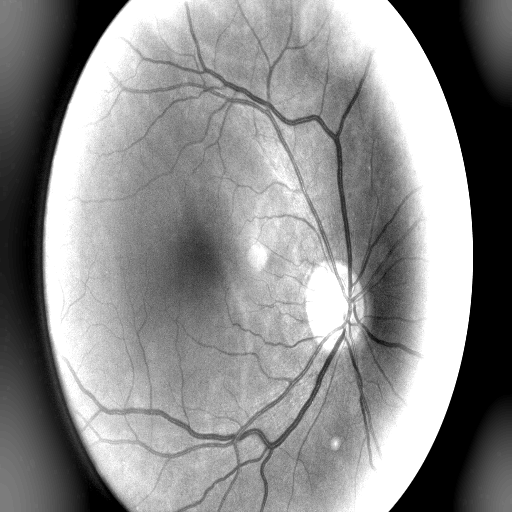

In [ ]:
cv2_imshow(processed_imge)

In [ ]:
cv2_imshow(img)

The original image is in BGR which is converted to RGB first, then resizing the image to 512*512. The weighted addition of the original image and the gaussian blur is done to obtain the final image.

In [ ]:
def load_color(path,sigmaX=10):
  image = cv2.imread(path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(512,512))
  image = cv2.addWeighted(image,4,cv2.GaussianBlur(image,(0,0),sigmaX),-4,128)
  return image

In [ ]:
def load_color_var1(path,sigmaX=10):
  image = cv2.imread(path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(512,512))
  image = cv2.addWeighted(image,8,cv2.GaussianBlur(image,(0,0),sigmaX),-8,128)
  return image

In [ ]:
ben_img = load_color(root_path)

In [ ]:
img_var1 = load_color_var1(root_path)

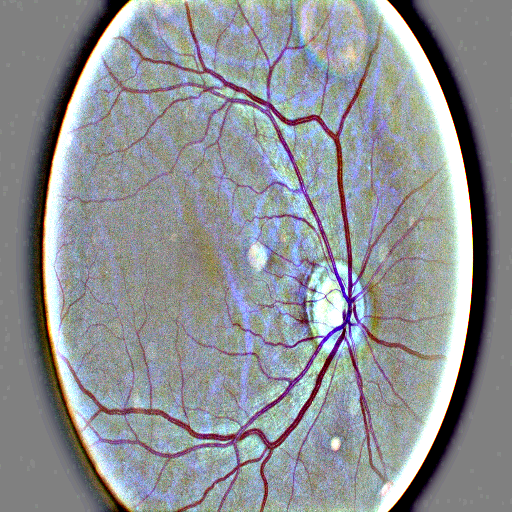

In [ ]:
cv2_imshow(img_var1)

Preprocessing of the images in the training set

In [ ]:
import glob
import os
dir_path = '/content/gdrive/MyDrive/Training/1/'
new_path = '/content/gdrive/MyDrive/Training/Gaussian_Preprocessing/'

for filename in os.listdir(dir_path):
  img_path = os.path.join(dir_path,filename)
  img = load_color_var1(img_path)
  cv2.imwrite(os.path.join(new_path,filename),img)


Plotting all the variations of the image

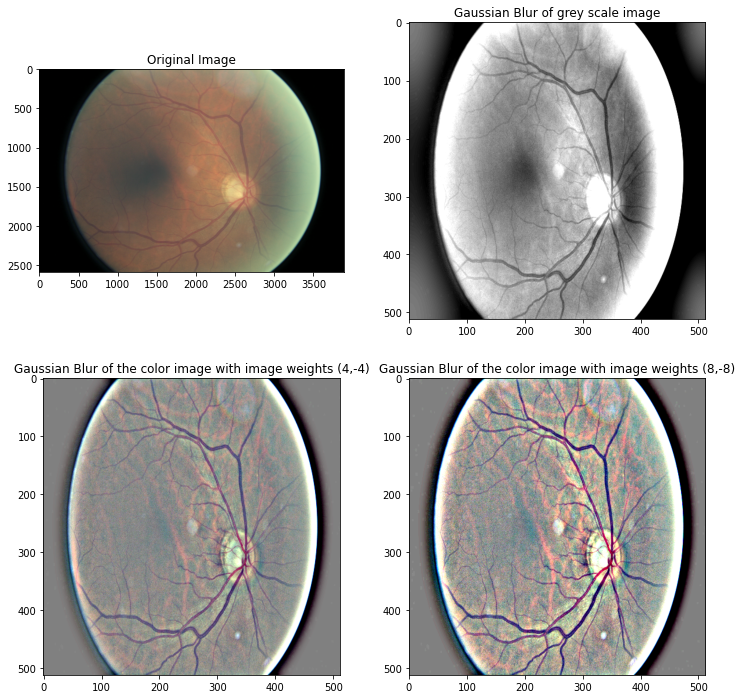

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,2,1)
ax.set_title('Original Image')
ax.imshow(img[...,::-1])
ax = fig.add_subplot(2,2,2)
ax.set_title('Gaussian Blur of grey scale image')
ax.imshow(processed_imge,cmap='gray')
ax = fig.add_subplot(2,2,3)
ax.set_title('Gaussian Blur of the color image with image weights (4,-4)')
ax.imshow(ben_img)
ax = fig.add_subplot(2,2,4)
ax.set_title('Gaussian Blur of the color image with image weights (8,-8)')
ax.imshow(img_var1)